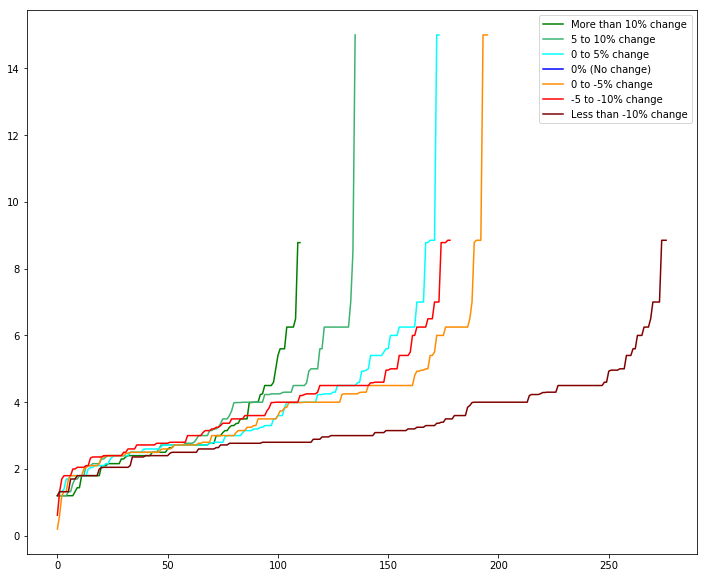

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

xl=pd.ExcelFile('RAW FINAL CGPA Vs Package Report of 2018,2017,2016 (14-feb-18).xlsx')
sheet1=xl.parse(0)

qp,cp,pkg=sheet1['Qualifying Marks'],sheet1['Current Course Percentage'],sheet1['Max Package']

df=pd.DataFrame(np.column_stack([qp,cp,pkg]),columns=['Qualifying percentage','Current percentage','Max Package'])
df['Qualifying percentage'].replace('Not Available',np.nan,inplace=True)
df.dropna(inplace=True)
df=df[df['Max Package']>0]
df['Change'] = df['Current percentage'] - df['Qualifying percentage']

lines=[]
lines.append([])
lines.append([])
lines.append([])
lines.append([])
lines.append([])
lines.append([])
lines.append([])
for i,j in zip(df['Change'],df['Max Package']):
    if i>10:
        lines[0].append(j)
    elif i>5 and i<=10:
        lines[1].append(j)
    elif i<=5 and i>0:
        lines[2].append(j)
    elif i==0.0:
        lines[3].append(j)
    elif i<0 and i>=-5:
        lines[4].append(j)
    elif i<-5 and i>=-10:
        lines[5].append(j)
    elif i<-10:
        lines[6].append(j)
    else:
        print(i,j,'errorsome value')

ucolors=['g','mediumseagreen','aqua','b','darkorange','r','maroon']
categories=['More than 10% change','5 to 10% change','0 to 5% change','0% (No change)','0 to -5% change','-5 to -10% change', 'Less than -10% change']

plt.figure(figsize=(12,10))
ax = plt.subplot(111)
for i in range(7):
    lines[i].sort()
    x=np.arange(0,len(lines[i]))
    ax.plot(x,lines[i], color = ucolors[i], label=categories[i])
plt.legend()
plt.show()

